In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
import cv2
import PIL
import pydicom as dicom
from tensorflow.keras.layers import Dense,Conv2D, Dropout,Flatten, MaxPooling2D
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

from sklearn.decomposition import PCA

In [2]:
nodCount = pd.read_excel("lidc-idri nodule counts (6-23-2015).xlsx",sheet_name = 'Sheet1')

In [3]:
nodCount.isnull().any()

TCIA Patent ID                True
Total Number of Nodules*     False
Number of Nodules >=3mm**    False
Number of Nodules <3mm***    False
Unnamed: 4                    True
Unnamed: 5                    True
dtype: bool

In [4]:
nodCount.drop(['Unnamed: 4','Unnamed: 5'], inplace = True,axis=1)

In [5]:
nodCount = nodCount.dropna(axis=0)


In [6]:
patID = nodCount["TCIA Patent ID"]

In [7]:
totalNodules = nodCount["Total Number of Nodules* "]

In [18]:
noNodules = []
position= 0
for i in totalNodules:
    if i == 0:
        noNodules.append(patID[position])
    position+=1
print(noNodules)    

['LIDC-IDRI-0306', 'LIDC-IDRI-0307', 'LIDC-IDRI-0322', 'LIDC-IDRI-0364', 'LIDC-IDRI-0441', 'LIDC-IDRI-0506', 'LIDC-IDRI-0540', 'LIDC-IDRI-0564', 'LIDC-IDRI-0573', 'LIDC-IDRI-0612', 'LIDC-IDRI-0668', 'LIDC-IDRI-0689', 'LIDC-IDRI-0716', 'LIDC-IDRI-0731', 'LIDC-IDRI-0760', 'LIDC-IDRI-0887', 'LIDC-IDRI-0900', 'LIDC-IDRI-0937', 'LIDC-IDRI-0975', 'LIDC-IDRI-0995']


In [17]:
hvNodules = []
position = 0
for i in totalNodules:
    if i != 0:
        hvNodules.append(patID[position])
    position+=1 
print(hvNodules)
    

['LIDC-IDRI-0001', 'LIDC-IDRI-0002', 'LIDC-IDRI-0003', 'LIDC-IDRI-0004', 'LIDC-IDRI-0005', 'LIDC-IDRI-0006', 'LIDC-IDRI-0007', 'LIDC-IDRI-0008', 'LIDC-IDRI-0009', 'LIDC-IDRI-0010', 'LIDC-IDRI-0011', 'LIDC-IDRI-0012', 'LIDC-IDRI-0013', 'LIDC-IDRI-0014', 'LIDC-IDRI-0015', 'LIDC-IDRI-0016', 'LIDC-IDRI-0017', 'LIDC-IDRI-0018', 'LIDC-IDRI-0019', 'LIDC-IDRI-0020', 'LIDC-IDRI-0021', 'LIDC-IDRI-0022', 'LIDC-IDRI-0023', 'LIDC-IDRI-0024', 'LIDC-IDRI-0025', 'LIDC-IDRI-0026', 'LIDC-IDRI-0027', 'LIDC-IDRI-0028', 'LIDC-IDRI-0029', 'LIDC-IDRI-0030', 'LIDC-IDRI-0031', 'LIDC-IDRI-0032', 'LIDC-IDRI-0033', 'LIDC-IDRI-0034', 'LIDC-IDRI-0035', 'LIDC-IDRI-0036', 'LIDC-IDRI-0037', 'LIDC-IDRI-0038', 'LIDC-IDRI-0039', 'LIDC-IDRI-0040', 'LIDC-IDRI-0041', 'LIDC-IDRI-0042', 'LIDC-IDRI-0043', 'LIDC-IDRI-0044', 'LIDC-IDRI-0045', 'LIDC-IDRI-0046', 'LIDC-IDRI-0047', 'LIDC-IDRI-0048', 'LIDC-IDRI-0049', 'LIDC-IDRI-0050', 'LIDC-IDRI-0051', 'LIDC-IDRI-0052', 'LIDC-IDRI-0053', 'LIDC-IDRI-0054', 'LIDC-IDRI-0055', 'LIDC-IDR

In [13]:
os.mkdir("Zero Nodules")

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'Zero Nodules'

In [11]:
os.mkdir("Potentially Cancerous")


In [14]:
ORIGIN = "C:/Users/Hp/Documents/Data Science/LIDC/LIDC-IDRI"


In [16]:
folders = []
for f in os.listdir(ORIGIN):
    folders.append(f)

POTENTIALLY_CANCEROUS = []
ZERO_NODULES = []

for folder in folders:
    print(folder)
    if folder == hvNodules[count]:
        POTENTIALLY_CANCEROUS.append(folder)
    else:   
        ZERO_NODULES.append(folder)
    
for i in POTENTIALLY_CANCEROUS:
    shutil.move((ORIGIN+'/'+i),"Potentially Cancerous")
    
for i  in ZERO_NODULES:
    shutil.move((ORIGIN+'/'+i),'Zero Nodules')

    


LIDC-IDRI-0001
LIDC-IDRI-0002
LIDC-IDRI-0003
LIDC-IDRI-0004
LIDC-IDRI-0005
LIDC-IDRI-0006
LIDC-IDRI-0007
LIDC-IDRI-0008
LIDC-IDRI-0009
LIDC-IDRI-0010
LIDC-IDRI-0011
LIDC-IDRI-0012
LIDC-IDRI-0013
LIDC-IDRI-0014
LIDC-IDRI-0015
LIDC-IDRI-0016
LIDC-IDRI-0017
LIDC-IDRI-0018
LIDC-IDRI-0021
LIDC-IDRI-0022
LIDC-IDRI-0023
LIDC-IDRI-0024
LIDC-IDRI-0025
LIDC-IDRI-0026
LIDC-IDRI-0027
LIDC-IDRI-0028
LIDC-IDRI-0029
LIDC-IDRI-0030
LIDC-IDRI-0031
LIDC-IDRI-0032
LIDC-IDRI-0033
LIDC-IDRI-0034
LIDC-IDRI-0035
LIDC-IDRI-0036
LIDC-IDRI-0037
LIDC-IDRI-0038
LIDC-IDRI-0039
LIDC-IDRI-0040
LIDC-IDRI-0041
LIDC-IDRI-0042
LIDC-IDRI-0043
LIDC-IDRI-0044
LIDC-IDRI-0045
LIDC-IDRI-0046
LIDC-IDRI-0047
LIDC-IDRI-0048
LIDC-IDRI-0049
LIDC-IDRI-0050
LIDC-IDRI-0051
LIDC-IDRI-0052
LIDC-IDRI-0053
LIDC-IDRI-0054
LIDC-IDRI-0055


In [19]:
X = []
y = []

In [27]:
def convert_NoNodules():
    dcm_path = "C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules"
    jpg_path = "C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/Images"
    patients = os.listdir(dcm_path)
    images_path = []
    os.mkdir(jpg_path)
    for i in patients:
      ##  images_path.append(os.path.join(dcm_path,i))
        images_path.append((dcm_path+"/"+i))
    for patient in images_path:
        print(patient)
        for img in os.listdir(patient):
            print(img)
            print(patient+'/'+img)
            ds = dicom.dcmread((patient+'/'+img),force = False)
            pixel_array_numpy = ds.pixel_array
            
            img = img.replace('.dcm','.png')
            os.chdir(jpg_path)
            cv2.imwrite(img,pixel_array_numpy)
            pixel_array = cv2.imread(img)
            print("done")

    

In [22]:
def convert_hvNodules():
    dcm_path = "C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous"
    jpg_path = "C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images"
    patients = os.listdir(dcm_path)
    images_path = []
    os.mkdir(jpg_path)
    for i in patients:
      ##  images_path.append(os.path.join(dcm_path,i))
        images_path.append((dcm_path+"/"+i))
    for patient in images_path:
        print(patient)
        for img in os.listdir(patient):
            print(img)
            print(patient+'/'+img)
            ds = dicom.dcmread((patient+'/'+img),force = False)
            pixel_array_numpy = ds.pixel_array
            
            img = img.replace('.dcm','.png')
            os.chdir(jpg_path)
            cv2.imwrite(img,pixel_array_numpy)
            pixel_array = cv2.imread(img)
            print("done")

    pixels = pixel_array_numpy
        
        #if n%50 == 0:
           # print('{} image converted'.format(n))

    
    

In [23]:
convert_hvNodules()

C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0001
1-001.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0001/1-001.dcm
done
1-002.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0001/1-002.dcm
done
1-003.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0001/1-003.dcm
done
1-004.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0001/1-004.dcm
done
1-005.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0001/1-005.dcm
done
1-006.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0001/1-006.dcm
done
1-007.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0001/1-007.dcm
done
1-008.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0001/1-008.dcm
done
1-009.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0001/1-009.dcm
done
1-010

done
1-085.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0001/1-085.dcm
done
1-086.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0001/1-086.dcm
done
1-087.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0001/1-087.dcm
done
1-088.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0001/1-088.dcm
done
1-089.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0001/1-089.dcm
done
1-090.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0001/1-090.dcm
done
1-091.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0001/1-091.dcm
done
1-092.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0001/1-092.dcm
done
1-093.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0001/1-093.dcm
done
1-094.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-

done
1-033.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-033.dcm
done
1-034.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-034.dcm
done
1-035.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-035.dcm
done
1-036.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-036.dcm
done
1-037.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-037.dcm
done
1-038.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-038.dcm
done
1-039.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-039.dcm
done
1-040.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-040.dcm
done
1-041.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-041.dcm
done
1-042.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-

done
1-119.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-119.dcm
done
1-120.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-120.dcm
done
1-121.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-121.dcm
done
1-122.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-122.dcm
done
1-123.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-123.dcm
done
1-124.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-124.dcm
done
1-125.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-125.dcm
done
1-126.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-126.dcm
done
1-127.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-127.dcm
done
1-128.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-

done
1-200.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-200.dcm
done
1-201.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-201.dcm
done
1-202.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-202.dcm
done
1-203.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-203.dcm
done
1-204.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-204.dcm
done
1-205.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-205.dcm
done
1-206.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-206.dcm
done
1-207.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-207.dcm
done
1-208.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0002/1-208.dcm
done
1-209.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-

done
1-019.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0003/1-019.dcm
done
1-020.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0003/1-020.dcm
done
1-021.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0003/1-021.dcm
done
1-022.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0003/1-022.dcm
done
1-023.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0003/1-023.dcm
done
1-024.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0003/1-024.dcm
done
1-025.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0003/1-025.dcm
done
1-026.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0003/1-026.dcm
done
1-027.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0003/1-027.dcm
done
1-028.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-

done
1-100.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0003/1-100.dcm
done
1-101.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0003/1-101.dcm
done
1-102.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0003/1-102.dcm
done
1-103.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0003/1-103.dcm
done
1-104.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0003/1-104.dcm
done
1-105.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0003/1-105.dcm
done
1-106.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0003/1-106.dcm
done
1-107.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0003/1-107.dcm
done
1-108.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0003/1-108.dcm
done
1-109.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-

done
1-040.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-040.dcm
done
1-041.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-041.dcm
done
1-042.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-042.dcm
done
1-043.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-043.dcm
done
1-044.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-044.dcm
done
1-045.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-045.dcm
done
1-046.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-046.dcm
done
1-047.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-047.dcm
done
1-048.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-048.dcm
done
1-049.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-

1-122.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-122.dcm
done
1-123.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-123.dcm
done
1-124.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-124.dcm
done
1-125.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-125.dcm
done
1-126.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-126.dcm
done
1-127.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-127.dcm
done
1-128.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-128.dcm
done
1-129.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-129.dcm
done
1-130.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-130.dcm
done
1-131.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-

done
1-203.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-203.dcm
done
1-204.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-204.dcm
done
1-205.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-205.dcm
done
1-206.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-206.dcm
done
1-207.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-207.dcm
done
1-208.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-208.dcm
done
1-209.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-209.dcm
done
1-210.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-210.dcm
done
1-211.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0004/1-211.dcm
done
1-212.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-

done
1-047.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0005/1-047.dcm
done
1-048.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0005/1-048.dcm
done
1-049.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0005/1-049.dcm
done
1-050.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0005/1-050.dcm
done
1-051.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0005/1-051.dcm
done
1-052.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0005/1-052.dcm
done
1-053.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0005/1-053.dcm
done
1-054.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0005/1-054.dcm
done
1-055.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0005/1-055.dcm
done
1-056.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-

done
1-130.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0005/1-130.dcm
done
1-131.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0005/1-131.dcm
done
1-132.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0005/1-132.dcm
done
1-133.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0005/1-133.dcm
done
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0006
1-001.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0006/1-001.dcm
done
1-002.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0006/1-002.dcm
done
1-003.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0006/1-003.dcm
done
1-004.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0006/1-004.dcm
done
1-005.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0006/1-005.dcm
done


done
1-079.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0006/1-079.dcm
done
1-080.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0006/1-080.dcm
done
1-081.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0006/1-081.dcm
done
1-082.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0006/1-082.dcm
done
1-083.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0006/1-083.dcm
done
1-084.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0006/1-084.dcm
done
1-085.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0006/1-085.dcm
done
1-086.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0006/1-086.dcm
done
1-087.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0006/1-087.dcm
done
1-088.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-

done
1-028.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0007/1-028.dcm
done
1-029.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0007/1-029.dcm
done
1-030.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0007/1-030.dcm
done
1-031.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0007/1-031.dcm
done
1-032.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0007/1-032.dcm
done
1-033.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0007/1-033.dcm
done
1-034.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0007/1-034.dcm
done
1-035.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0007/1-035.dcm
done
1-036.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0007/1-036.dcm
done
1-037.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-

done
1-111.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0007/1-111.dcm
done
1-112.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0007/1-112.dcm
done
1-113.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0007/1-113.dcm
done
1-114.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0007/1-114.dcm
done
1-115.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0007/1-115.dcm
done
1-116.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0007/1-116.dcm
done
1-117.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0007/1-117.dcm
done
1-118.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0007/1-118.dcm
done
1-119.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0007/1-119.dcm
done
1-120.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-

done
1-046.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0008/1-046.dcm
done
1-047.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0008/1-047.dcm
done
1-048.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0008/1-048.dcm
done
1-049.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0008/1-049.dcm
done
1-050.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0008/1-050.dcm
done
1-051.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0008/1-051.dcm
done
1-052.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0008/1-052.dcm
done
1-053.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0008/1-053.dcm
done
1-054.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0008/1-054.dcm
done
1-055.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-

done
1-127.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0008/1-127.dcm
done
1-128.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0008/1-128.dcm
done
1-129.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0008/1-129.dcm
done
1-130.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0008/1-130.dcm
done
1-131.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0008/1-131.dcm
done
1-132.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0008/1-132.dcm
done
1-133.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0008/1-133.dcm
done
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0009
1-001.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0009/1-001.dcm
done
1-002.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0009/1-002.dcm
done


done
1-074.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0009/1-074.dcm
done
1-075.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0009/1-075.dcm
done
1-076.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0009/1-076.dcm
done
1-077.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0009/1-077.dcm
done
1-078.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0009/1-078.dcm
done
1-079.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0009/1-079.dcm
done
1-080.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0009/1-080.dcm
done
1-081.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0009/1-081.dcm
done
1-082.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-IDRI-0009/1-082.dcm
done
1-083.dcm
C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/LIDC-

ValueError: The length of the pixel data in the dataset (448424 bytes) doesn't match the expected length (524288 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.

In [28]:
convert_NoNodules()

In [29]:
ZERO_NODULES_IMG_PATH =  "C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/Images"

In [30]:
for img in os.listdir(ZERO_NODULES_IMG_PATH):
    img = img_to_array(img)
    img = np.expand_dims(img,axis=0)
    aug = ImageDataGenerator(rotation = 30,
                            zoom_range = 0.15,
                            width_shift_range = 0.2,
                            height_shift_range = 0.2,
                            shear_range = 0.15,
                            horizontal_flip = True,
                            fill_mode = 'nearest')
    img_gen = aug.flow(img, batch_size = 1,
                      save_to_dir = ZERO_NODULES_IMG_PATH,
                      save_prefix = "aug_img",
                      save_format = 'jpg')
    total = 0
    for image in img_gen:
        total+=1
        if total==7:
            break

In [1]:
X = []
y = []

In [5]:
for i in os.listdir('C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images'):
    img_array = cv2.imread(('C:/Users/Hp/Documents/Data Science/LIDC/Potentially Cancerous/Images/'+i))
    X.append(img_array)
    y.append(1)

In [6]:
for i in os.listdir('C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/Images'):
    img_array = cv2.imread(('C:/Users/Hp/Documents/Data Science/LIDC/Zero Nodules/Images/'+i))
    X.append(img_array)
    y.append(0)


In [8]:
X = np.array(X)
X = X/255
y = np.array(y)

In [10]:
print(X.shape)


(522, 512, 512, 3)


In [11]:
X = X.transpose(2,0,1,3).reshape(-1,X.shape[1])

In [12]:
print(X.shape)
df = pd.DataFrame(X)

(801792, 512)


In [13]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
X = PCA(0.50).fit(X)
X.n_components_         #######noise filtering

1

In [16]:
print(X)

PCA(n_components=0.5)


In [23]:
classifier = Sequential()
#classifier.add(Flatten())
classifier.add(Conv2D(32,kernel_size=(3,3),input_shape=(512,512,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dense(128,activation='relu'))
classifier.add(Dense(2,activation = 'softmax'))

classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
classifier.fit(X,y, batch_size = 64, epochs =2, verbose = 1)

219/261 [========================>.....] - ETA: 11s - loss: 0.6932 - accuracy: 0.4499

In [ ]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


In [15]:
pca = PCA(2)

In [16]:
projected = pca.fit_transform(X)

In [17]:
print(X.shape)
print(projected.shape)

(801792, 512)
(801792, 2)


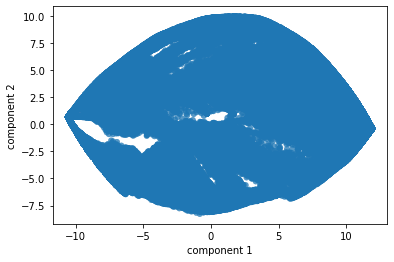

In [23]:
plt.scatter(projected[:,0],projected[:,1],
           #c = y, 
           edgecolor = 'none',
           alpha = 0.5,
           cmap = plt.cm.get_cmap('Accent',10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show();

In [ ]:
PREDICTION_FOLDER = ""

In [15]:
positive_count = 0
X_pred = []
for i in os.listdir(PREDICTION_FOLDER):
    img = PREDICTION_FOLDER+"/"+i
    arr = img_to_array(img)
    X_pred = np.array(X_pred)
    X_pred.append(arr)
    classifier.predict_proba(X_pred,verbose = 1)

FileNotFoundError: [WinError 3] The system cannot find the path specified: ''